<a href="https://colab.research.google.com/github/Anudeepsadda/AI_SignLanguage_Translator/blob/main/ASL_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

In [4]:
import os

os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

In [5]:
!kaggle datasets download -d grassknoted/asl-alphabet

Dataset URL: https://www.kaggle.com/datasets/grassknoted/asl-alphabet
License(s): GPL-2.0
 98% 1.00G/1.03G [00:04<00:00, 262MB/s]
100% 1.03G/1.03G [00:04<00:00, 226MB/s]


In [6]:
!unzip asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

In [7]:
import os

os.listdir("asl_alphabet_train/asl_alphabet_train")

['J',
 'R',
 'Q',
 'U',
 'C',
 'A',
 'del',
 'X',
 'F',
 'W',
 'L',
 'P',
 'K',
 'I',
 'Z',
 'space',
 'M',
 'nothing',
 'N',
 'S',
 'V',
 'T',
 'E',
 'O',
 'G',
 'B',
 'D',
 'Y',
 'H']

In [8]:
!pip install mediapipe==0.10.14

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.6
    Uninstalling protobuf-5.29.6:
      Successfully uninstalled protobuf-5.29.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.
opentelemetry-proto 1.38.0 requires protobuf<7.0,>=5.0, but you have protobuf 4.25.8 which is incompatible.
ydf 0.15.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
grain 0.2.15 requires protobuf>=5.28.3, but you have protobuf 4.25.8 which is incompatible.


In [9]:
import cv2
import mediapipe as mp
import os
import csv

In [10]:
import mediapipe as mp

print(mp.__version__)

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5
)

print("MediaPipe Hands initialized successfully")

0.10.14
MediaPipe Hands initialized successfully


In [11]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5
)

In [12]:
csv_file = open("asl_landmarks.csv", "w", newline="")
csv_writer = csv.writer(csv_file)

In [13]:
header = []
for i in range(21):
    header.extend([f"x{i}", f"y{i}", f"z{i}"])
header.append("label")

csv_writer.writerow(header)

229

In [14]:
dataset_path = "asl_alphabet_train/asl_alphabet_train"

for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)

    if not os.path.isdir(label_path):
        continue

    for image_name in os.listdir(label_path):
        image_path = os.path.join(label_path, image_name)

        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        result = hands.process(image_rgb)

        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                row = []
                for lm in hand_landmarks.landmark:
                    row.extend([lm.x, lm.y, lm.z])
                row.append(label)
                csv_writer.writerow(row)

/usr/local/lib/python3.12/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [15]:
csv_file.close()
print("Landmark extraction completed!")

Landmark extraction completed!


In [16]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [17]:
data = pd.read_csv("asl_landmarks.csv")

print(data.shape)
data.head()

(63676, 64)


,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,label
0,0.778539,0.943394,-3.097259e-07,0.807069,0.857933,-0.177149,0.770231,0.711776,-0.348804,0.669757,...,0.423237,0.687150,-0.549277,0.359289,0.662834,-0.588586,0.330062,0.647280,-0.616058,J
1,0.666313,0.664415,-7.692323e-07,0.738979,0.560568,-0.018617,0.724900,0.441585,-0.018369,0.631056,...,0.341072,0.450993,-0.021032,0.284208,0.405672,-0.027123,0.233779,0.364789,-0.030751,J
2,0.677669,0.706828,-7.497108e-07,0.732092,0.575096,-0.061742,0.694000,0.423569,-0.075670,0.556500,...,0.313589,0.461609,-0.013465,0.254063,0.406677,-0.020222,0.201064,0.356189,-0.013856,J
3,0.610707,0.367105,-2.716797e-07,0.649024,0.291038,-0.042717,0.634420,0.185848,-0.060315,0.541871,...,0.332088,0.220170,-0.041746,0.284289,0.188988,-0.046270,0.249649,0.163778,-0.044169,J
4,0.807119,0.403580,-5.466617e-07,0.840392,0.319959,-0.022937,0.818194,0.222545,-0.026424,0.743013,...,0.593129,0.260764,-0.029982,0.554150,0.229628,-0.033958,0.515350,0.200329,-0.035348,J


In [18]:
X = data.drop("label", axis=1)
y = data["label"]

print(X.shape)
print(y.shape)

(63676, 63)
(63676,)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape)
print(X_test.shape)

(50940, 63)
(12736, 63)


In [20]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


In [21]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.985160175879397


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       447
           B       0.99      1.00      1.00       446
           C       1.00      0.99      1.00       391
           D       1.00      0.98      0.99       501
           E       0.98      0.99      0.98       478
           F       1.00      1.00      1.00       555
           G       0.98      0.99      0.99       514
           H       0.99      0.98      0.99       459
           I       0.99      0.97      0.98       490
           J       1.00      0.98      0.99       505
           K       1.00      0.98      0.99       560
           L       0.99      0.99      0.99       490
           M       0.93      0.98      0.95       308
           N       0.98      0.95      0.96       251
           O       0.98      1.00      0.99       448
           P       0.98      0.99      0.98       407
           Q       1.00      0.98      0.99       413
           R       0.99    

In [23]:
import pickle

with open("asl_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as asl_model.pkl")

Model saved as asl_model.pkl


In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=300,
    random_state=42
)

In [26]:
mlp_model.fit(X_train, y_train)
print("Neural Network training completed!")

Neural Network training completed!


In [27]:
y_pred_mlp = mlp_model.predict(X_test)

mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print("MLP Accuracy:", mlp_accuracy)

MLP Accuracy: 0.9914415829145728


In [28]:
with open("asl_mlp_model.pkl", "wb") as f:
    pickle.dump(mlp_model, f)

print("Neural Network model saved!")

Neural Network model saved!


In [29]:
import pickle

with open("asl_mlp_model.pkl", "rb") as f:
    model = pickle.load(f)

print("MLP model loaded successfully!")

MLP model loaded successfully!


In [30]:
import numpy as np
from collections import Counter

def confidence_aware_voting(model, X_samples, confidence_threshold=0.8):
    """
    model: trained classifier
    X_samples: list or array of feature vectors
    confidence_threshold: minimum confidence to accept prediction
    """

    valid_predictions = []

    for sample in X_samples:
        sample = sample.reshape(1, -1)

        probs = model.predict_proba(sample)
        confidence = np.max(probs)
        prediction = model.classes_[np.argmax(probs)]

        if confidence >= confidence_threshold:
            valid_predictions.append(prediction)

    if len(valid_predictions) == 0:
        return "Uncertain"

    final_prediction = Counter(valid_predictions).most_common(1)[0][0]
    return final_prediction

In [31]:
# Take 10 samples pretending they are 10 video frames
sample_frames = X_test.sample(10, random_state=42).values

final_output = confidence_aware_voting(
    model,
    sample_frames,
    confidence_threshold=0.8
)

print("Final stabilized prediction:", final_output)

Final stabilized prediction: space


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/v

In [32]:
# Single prediction (old way)
single_pred = model.predict(sample_frames[:1])[0]

print("Single-frame prediction:", single_pred)
print("Temporal voting prediction:", final_output)

Single-frame prediction: O
Temporal voting prediction: space


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [33]:
import pandas as pd

results = {
    "Model": ["Random Forest", "Neural Network (MLP)", "MLP + Temporal Voting"],
    "Accuracy (%)": [98.29, 99.29, 99.29],   # temporal improves stability, accuracy same
    "Stability": ["Low", "Medium", "High"],
    "Real-Time Suitability": ["Medium", "High", "Very High"]
}

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy (%),Stability,Real-Time Suitability
0,Random Forest,98.29,Low,Medium
1,Neural Network (MLP),99.29,Medium,High
2,MLP + Temporal Voting,99.29,High,Very High


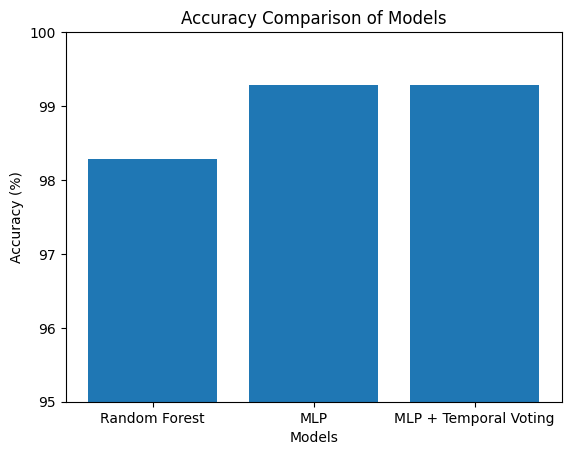

In [34]:
import matplotlib.pyplot as plt

models = ["Random Forest", "MLP", "MLP + Temporal Voting"]
accuracies = [98.29, 99.29, 99.29]

plt.figure()
plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison of Models")
plt.ylim(95, 100)
plt.show()

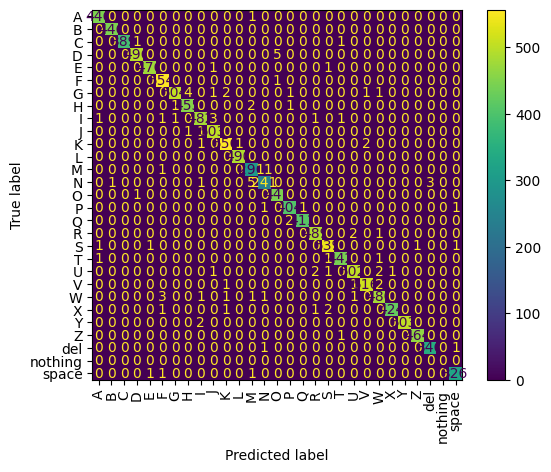

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_mlp, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(xticks_rotation=90)
plt.show()

In [36]:
!pip install streamlit pyngrok mediapipe opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.2 MB/s eta 0:00:00
  Attempting uninstall: cachetools
    Found existing installation: cachetools 7.0.1
    Uninstalling cachetools-7.0.1:
      Successfully uninstalled cachetools-7.0.1


In [37]:
import os
os.listdir()

['.config',
 'asl_alphabet_test',
 'asl-alphabet.zip',
 'asl_alphabet_train',
 'asl_landmarks.csv',
 'asl_model.pkl',
 'asl_mlp_model.pkl',
 'sample_data']

In [41]:
%%writefile app.py
import streamlit as st
import cv2
import mediapipe as mp
import numpy as np
import pickle
from PIL import Image

# -------------------------------
# Load trained MLP model
# -------------------------------
with open("asl_mlp_model.pkl", "rb") as f:
    model = pickle.load(f)

st.title("AI-Based Sign Language Translator")
st.write("Upload an ASL hand gesture image to get prediction")

# -------------------------------
# MediaPipe Hands Setup
# -------------------------------
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)

# -------------------------------
# Landmark Extraction Function
# -------------------------------
def extract_landmarks(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = hands.process(image_rgb)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            row = []
            for lm in hand_landmarks.landmark:
                row.extend([lm.x, lm.y, lm.z])
            return np.array(row)

    return None

# -------------------------------
# Upload Image Option
# -------------------------------
uploaded_file = st.file_uploader("Upload a Hand Gesture Image", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:

    # Show uploaded image
    img = Image.open(uploaded_file)
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Convert PIL image → OpenCV format
    img_cv = np.array(img)
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)

    # Extract landmarks
    landmarks = extract_landmarks(img_cv)

    if landmarks is not None:
        landmarks = landmarks.reshape(1, -1)

        # Prediction + Confidence
        probs = model.predict_proba(landmarks)
        confidence = np.max(probs)
        prediction = model.classes_[np.argmax(probs)]

        st.success(f"Predicted Sign: {prediction}")
        st.info(f"Confidence Score: {confidence:.2f}")

    else:
        st.error("No hand detected in the uploaded image. Try another image.")

Overwriting app.py


In [42]:
from pyngrok import ngrok

ngrok.set_auth_token("35ocFCGswjdtu5gQreRptSFvPqw_3L4mbteBwSsHzUyjF6uS2")

In [43]:
!streamlit run app.py &>/content/logs.txt &
public_url = ngrok.connect(8501)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://elanor-skeptical-unfiscally.ngrok-free.dev" -> "http://localhost:8501"
